# Tarea 2

### 1.- Método de las secántes
a) Para proponer un intervalo veamos las raices de la función a aproximar, que al ser cubica debe tener a lo más 3 raíces:

$$ x^3-10x^2+5 = 0$$
Entonces tenemos que

$$ x^2(x-10) +5= 0 $$

entonces
![alt text](img/sec.png)

d) Dados $x_1$ y $x_2$, haciendo $f(x_1) = f_1$ y $f(x_2)=f_2$, por semejanza de triangulos tenemos que:

$$ \dfrac{x_2-x_1}{f_2-f_1}=\dfrac{x_2-x_3}{f_2} $$

Luego tenemos que:

$$ f_2\dfrac{x_2-x_1}{f_2-f_1}=x_2-x_3 $$

Luego:

$$ -x_3 =-x_2+f_2\dfrac{x_2-x_1}{f_2-f_1} $$

así por tanto

$$ x_3 =x_2-f_2\dfrac{x_2-x_1}{f_2-f_1} $$

In [18]:
def secante(f,x1,x2,tol=1e-6):
    pasos = 0
    x3 = x2-f(x2)*(x2-x1)/(f(x2)-f(x1))
    while abs(x3-x2)>tol:
        x1=x2
        x2=x3
        x3 = x2-f(x2)*(x2-x1)/(f(x2)-f(x1))
        pasos += 1
    return x3,pasos

In [14]:
g = lambda x:x**3-10*x**2+5

In [15]:
print secante(g,0,.8)

(0.734603507785179, 4)


### 2.- Método de la falsa posición



In [19]:
def falsi(f,x1,x2,tol=1e-6):
    pasos = 0
    x3 = x2-f(x2)*(x2-x1)/(f(x2)-f(x1))
    while abs(x3-x2)>tol:
        if f(x2)*f(x1) > 0:
            x1=x3
            x3 = x2-f(x2)*(x2-x1)/(f(x2)-f(x1))
        else:
            x2 = x3
            x3 = x2-f(x2)*(x2-x1)/(f(x2)-f(x1))
        pasos += 1
    return x3,pasos

In [17]:
print falsi(g,0,1.)

(0.7346034613207099, 8)


### Método de Ridder


In [53]:
def ridder(f,x1,x2,tol=1e-6):
    x3 = (x1+x2)/2
    pasos = 0
    if f(x3) == 0:
        pasos += 1
        return x3,pasos
    else:
        if f(x1)-f(x2)>0:
            x4 = x3 + (x3-x1)*f(x3)/sqrt(f(x3)**2-f(x1)*f(x2))
        elif f(x1)-f(x2)<0:
            x4 = x3 - (x3-x1)*f(x3)/sqrt(f(x3)**2-f(x1)*f(x2))
        while (x4-x3) > tol:
            x1 = x2
            x2 = x3
            x3 = (x1+x2)/2
            if f(x3) == 0:
                pasos += 1
                return x3,pasos
            else:
                if f(x1)-f(x2)>0:
                    x4 = x3 + (x3-x1)*f(x3)/sqrt(f(x3)**2-f(x1)*f(x2))
                elif f(x1)-f(x2)<0:
                    x4 = x3 - (x3-x1)*f(x3)/sqrt(f(x3)**2-f(x1)*f(x2))
            pasos +=1
        return x4,pasos
            

In [54]:
h = lambda x: 1./((x-.3)**2+.001)-1./((x-.8)**2+.004)

In [23]:
from pylab import *

(-10, 10)

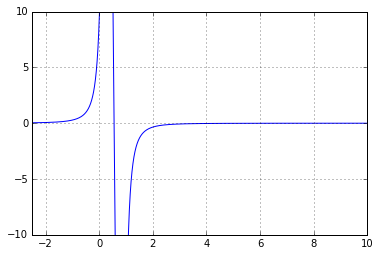

In [55]:
x = arange(-10,10,0.001)
plot(x,h(x));grid(True);xlim(-2.5,10);ylim(-10,10)

In [56]:
ridder(h,0,1.,1e-10)

(0.5015882417931123, 1)

In [57]:
h(0.5015882417931123)

13.269668567919181